# House Sales Prediction

### Import Necessary Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

### Read Input Files

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


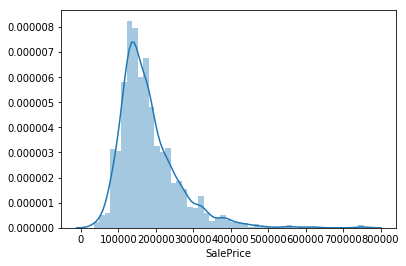

In [3]:
sns.distplot(train_data['SalePrice'])

In [4]:
def feature_description(df):
    desc_list = []
    for col in df.columns:
        desc_dict = {}
        desc_dict[col] = {}
        desc_dict[col]['Type'] = df[col].dtype
        desc_dict[col]['Unique'] = df[col].nunique()
        desc_dict[col]['MissingValueCount'] = df[col].isnull().sum()
        desc_dict[col]['Most_Occured'] = df[col].mode()[:1].values[0]
        if df[col].dtype != 'object':
            desc_dict[col]['Mean'] =  df[col].mean()
            desc_dict[col]['Median'] =  df[col].median()
            desc_dict[col]['1stQuantile'] =  df[col].quantile([0.25]).values[0]
            desc_dict[col]['2ndQuantile'] =  df[col].quantile([0.5]).values[0]
            desc_dict[col]['3rdQuantile'] =  df[col].quantile([0.75]).values[0]
            
        desc_list.append(desc_dict.copy())
        result_df = pd.DataFrame(desc_list[0])
        for i,each in enumerate(desc_list):
            if i != 0:
                temp = pd.DataFrame(each)
                result_df = result_df.join(temp).fillna(0)
    return result_df.T

In [5]:
feature_description(test_data)

,1stQuantile,2ndQuantile,3rdQuantile,Mean,Median,MissingValueCount,Most_Occured,Type,Unique
Id,1825.5,2190,2554.5,2190,2190,0,1461,int64,1459
MSSubClass,20,50,70,57.3783,50,0,20,int64,16
MSZoning,0,0,0,0,0,4,RL,object,5
LotFrontage,58,67,80,68.5804,67,227,60,float64,115
LotArea,7391,9399,11517.5,9819.16,9399,0,9600,int64,1106
Street,0,0,0,0,0,0,Pave,object,2
Alley,0,0,0,0,0,1352,Grvl,object,2
LotShape,0,0,0,0,0,0,Reg,object,4
LandContour,0,0,0,0,0,0,Lvl,object,4
Utilities,0,0,0,0,0,2,AllPub,object,1


### Train_data

In [6]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [256]:
def plot_distribution(df):
    fig = plt.figure(figsize=(10,60))
    i = 1
    s = len(df.columns)
    for each in df.columns:
        fig.add_subplot(s/2, 4, i)
        plt.title(each)
        if df[each].dtype != 'object':
            df[each].plot(figsize=(10,60),kind='hist')
            i += 1
        else:
            df[each].value_counts()[:10].plot(figsize=(20,60),kind='bar')
            i += 1

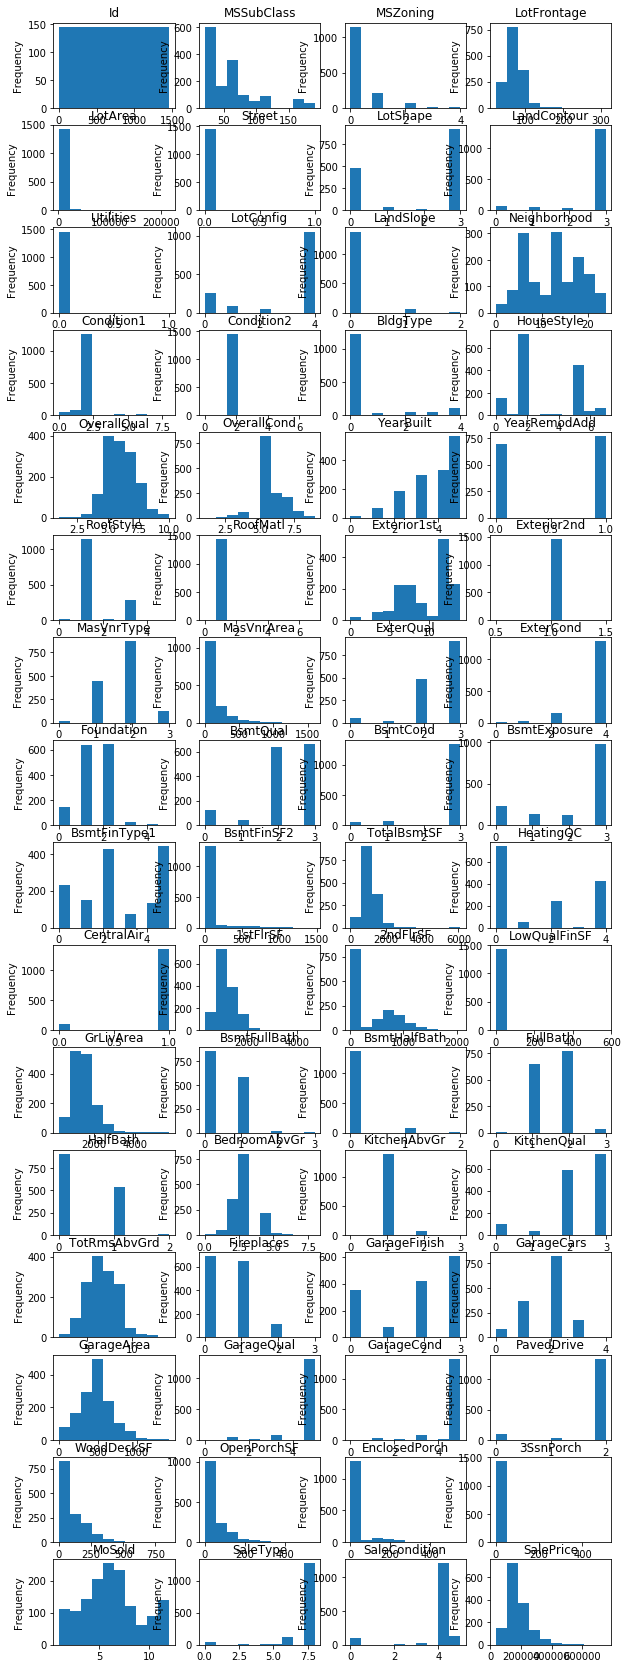

In [257]:
plot_distribution(train_data)

### Test_data

In [10]:
test_data.shape

(1459, 80)

In [11]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [14]:
test_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


### Ignore Warnings


In [15]:
import warnings
warnings.filterwarnings('ignore')


### Remove Duplicate Features

In [16]:
colsToRemove = []
colsScaned = []
dupList = {}

columns = train_data.columns

for i in range(len(columns)-1):
    v = train_data[columns[i]].values
    dupCols = []
    for j in range(i+1,len(columns)):
        if np.array_equal(v, train_data[columns[j]].values):
            colsToRemove.append(columns[j])
            if columns[j] not in colsScaned:
                dupCols.append(columns[j]) 
                colsScaned.append(columns[j])
                dupList[columns[i]] = dupCols
                
print "Columns to remove", colsToRemove

Columns to remove []


### Missing Data

In [17]:
total = train_data.isnull().sum().sort_values(ascending = False)
percent = (train_data.isnull().sum()/train_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total missing', 'Percent missing'])
missing_train_data.head(20)


,Total missing,Percent missing
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


In [18]:
total = test_data.isnull().sum().sort_values(ascending = False)
percent = (test_data.isnull().sum()/test_data.isnull().count()*100).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total missing', 'Percent missing'])
missing_train_data.head(20)

,Total missing,Percent missing
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
FireplaceQu,730,50.034270
LotFrontage,227,15.558602
GarageCond,78,5.346127
GarageQual,78,5.346127
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127


### Drop the columns which have the missing values greater greater than 50%

In [19]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [20]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)


In [21]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [22]:
train_data.YearBuilt.value_counts().__len__()

112

In [23]:
train_data.YearRemodAdd.value_counts().__len__()

61

In [24]:
train_data['RecentlyModifiedInYears'] = train_data.YearRemodAdd - train_data.YearBuilt

In [25]:
test_data['RecentlyModifiedInYears'] = test_data.YearRemodAdd - test_data.YearBuilt

In [26]:
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

In [27]:
test_data['HouseAge'] = test_data['YrSold'] - test_data['YearBuilt']

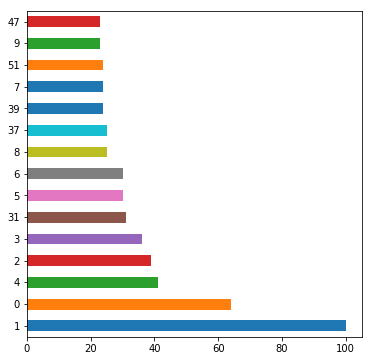

In [28]:
train_data['HouseAge'].value_counts()[:15].plot(kind='barh',figsize=(6,6))

In [29]:
train_data.GarageYrBlt.value_counts().__len__()

97

In [30]:
print train_data.GarageYrBlt.isnull().sum()
print train_data.YrSold.isnull().sum()
print train_data.YearBuilt.isnull().sum()
print train_data.YearRemodAdd.isnull().sum()

81
0
0
0


In [31]:
f = train_data.GarageYrBlt.mode().values[0]

In [32]:
print train_data.GarageYrBlt.isnull().sum()

81


In [33]:
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(f)


In [34]:
train_data['GarageAge'] = train_data.YrSold - train_data.GarageYrBlt        

In [35]:
test_data['GarageAge'] = test_data.YrSold - test_data.GarageYrBlt

In [36]:
train_data['GarageAge'].value_counts()

1.0      102
0.0       84
4.0       60
3.0       57
2.0       52
5.0       45
31.0      31
6.0       31
8.0       30
10.0      27
9.0       27
7.0       26
32.0      25
11.0      25
42.0      24
30.0      23
53.0      22
51.0      22
44.0      22
37.0      22
47.0      21
41.0      20
12.0      20
39.0      20
49.0      20
15.0      20
14.0      19
48.0      18
20.0      17
16.0      17
46.0      16
40.0      16
34.0      16
33.0      15
50.0      15
43.0      15
13.0      14
28.0      14
38.0      14
45.0      14
17.0      14
29.0      14
54.0      13
59.0      13
36.0      13
69.0      12
52.0      12
26.0      11
35.0      11
56.0      11
57.0      10
18.0      10
21.0       9
27.0       9
83.0       9
19.0       9
55.0       9
58.0       9
22.0       9
60.0       8
67.0       8
88.0       8
24.0       7
25.0       7
70.0       7
68.0       6
84.0       6
23.0       6
81.0       6
66.0       6
79.0       6
74.0       5
62.0       5
61.0       5
86.0       5
89.0       4
77.0       4

In [37]:
train_data.sample(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RecentlyModifiedInYears,HouseAge,GarageAge
381,382,20,FV,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,1293,1293,GasA,Ex,Y,SBrkr,1301,0,0,1301,1,0,2,0,2,1,Gd,5,Typ,1,Attchd,2006.0,RFn,2,572,TA,TA,Y,216,121,0,0,0,0,0,8,2006,New,Partial,187750,0,0,0.0
1209,1210,20,RL,85.0,10182,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,RRNn,Norm,1Fam,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,420.0,Gd,TA,PConc,Ex,TA,Mn,GLQ,1220,Unf,0,440,1660,GasA,Ex,Y,SBrkr,1660,0,0,1660,1,0,2,0,3,1,Gd,8,Typ,1,Attchd,2006.0,RFn,2,500,TA,TA,Y,322,50,0,0,0,0,0,5,2006,New,Partial,290000,0,0,0.0


In [38]:
train_data = train_data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)


In [39]:
test_data = test_data.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1)

In [40]:
train_data.shape

(1460, 75)

<Figure size 864x864 with 0 Axes>

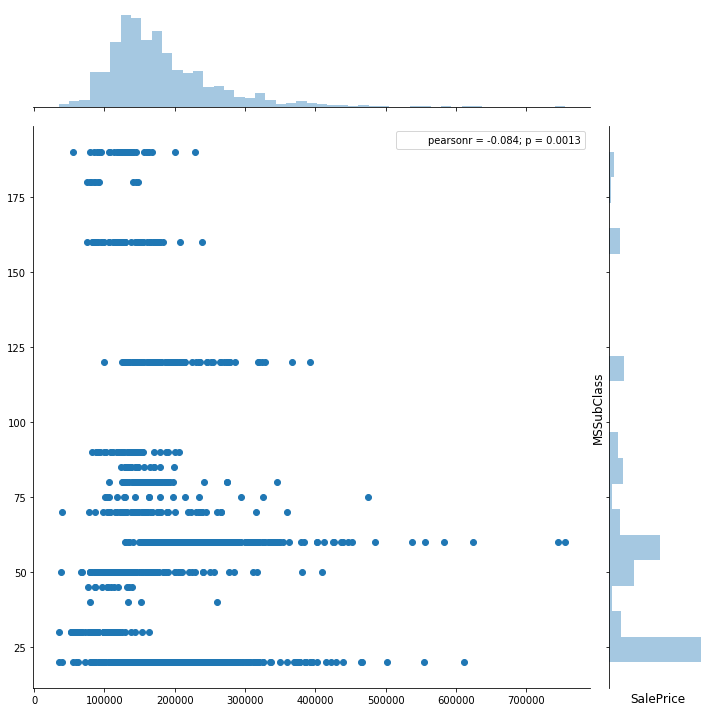

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sns.jointplot(x=train_data.SalePrice.values, y=train_data.MSSubClass.values, size=10)
plt.ylabel('MSSubClass', fontsize=12)
plt.xlabel('SalePrice', fontsize=12)
plt.show()

#### MSSubClass

In [42]:
train_data.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [43]:
train_data.MSSubClass.isnull().any()

False

In [44]:
test_data.MSSubClass.isnull().any()

False

#### MSZoning

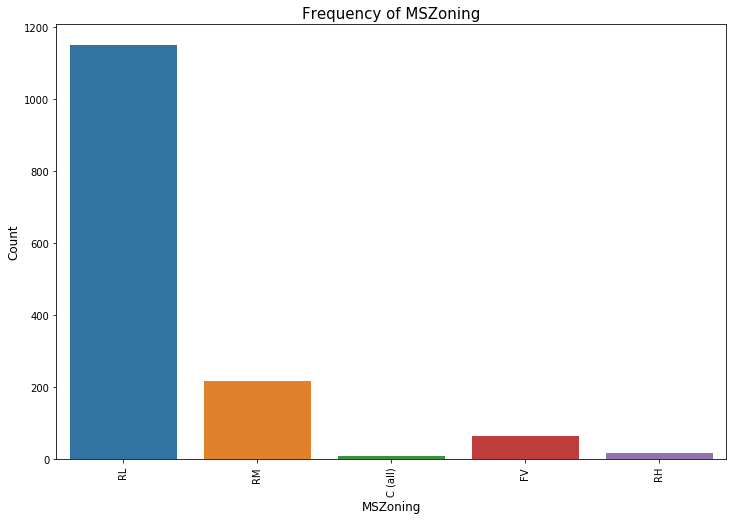

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x="MSZoning", data=train_data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('MSZoning', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of MSZoning", fontsize=15)
plt.show()


In [46]:
train_data.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
train_data.MSZoning.isnull().any()

False

In [48]:
test_data.MSZoning.isnull().any()

True

In [49]:
test_data.MSZoning.mode()

0    RL
dtype: object

In [50]:
test_data.MSZoning.mode().values[0]

'RL'

In [51]:
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data.MSZoning.mode().values[0])

In [52]:
test_data.MSZoning.isnull().any()

False

In [53]:
'''
Create a new values for this column.
Values will range from 0 to 4 to indicate differenct Zones

0 -  RL
1 -  RM
2 -  FV
3 -  RH
4 -  C (all)
'''

for i in train_data.index:
    if train_data['MSZoning'][i] == 'RL':
        train_data.set_value(i,'MSZoning',0)
    elif train_data['MSZoning'][i] == 'RM':
        train_data.set_value(i,'MSZoning',1)
    elif train_data['MSZoning'][i] == 'FV':
        train_data.set_value(i,'MSZoning',2)
    elif train_data['MSZoning'][i] == 'RH':
        train_data.set_value(i,'MSZoning',3)
    elif train_data['MSZoning'][i] == 'C (all)':
        train_data.set_value(i,'MSZoning',4)

In [54]:
for i in test_data.index:
    if test_data['MSZoning'][i] == 'RL':
        test_data.set_value(i,'MSZoning',0)
    elif test_data['MSZoning'][i] == 'RM':
        test_data.set_value(i,'MSZoning',1)
    elif test_data['MSZoning'][i] == 'FV':
        test_data.set_value(i,'MSZoning',2)
    elif test_data['MSZoning'][i] == 'RH':
        test_data.set_value(i,'MSZoning',3)
    elif test_data['MSZoning'][i] == 'C (all)':
        test_data.set_value(i,'MSZoning',4)

In [55]:
test_data.MSZoning.isnull().sum()

0

In [56]:
test_data.shape

(1459, 74)

### LotFrontage

In [57]:
train_data.LotFrontage.isnull().sum()


259

In [58]:
train_data['LotFrontage'].fillna(method='ffill', inplace=True)


In [59]:
train_data.LotFrontage.isnull().sum()

0

In [60]:
test_data.LotFrontage.isnull().sum()


227

In [61]:
test_data['LotFrontage'].fillna(method='ffill', inplace=True)


In [62]:
test_data.LotFrontage.isnull().sum()

0

### LotArea

In [63]:
train_data.LotArea.isnull().sum()

0

In [64]:
test_data.LotArea.isnull().sum()

0

### Street

In [65]:
train_data.Street.isnull().sum()

0

In [66]:
test_data.Street.isnull().sum()

0

In [67]:
'''
Create a new values for this column.
Values will range from 0 to 1 to indicate differenct Streets

0 -  Pave
1 -  Grvl
'''

for i in train_data.index:
    if train_data['Street'][i] == 'Pave':
        train_data.set_value(i,'Street',0)
    elif train_data['Street'][i] == 'Grvl':
        train_data.set_value(i,'Street',1)

In [68]:
for i in test_data.index:
    if test_data['Street'][i] == 'Pave':
        test_data.set_value(i,'Street',0)
    elif test_data['Street'][i] == 'Grvl':
        test_data.set_value(i,'Street',1)

### LotShape

In [69]:
train_data.LotShape.isnull().sum()

0

In [70]:
test_data.LotShape.isnull().sum()

0

In [71]:
'''
Create a new values for this column.
Values will range from 0 to 3 to indicate differenct Shapes

0 -  IR1
1 -  IR2
2 -  IR3
3 -  Reg

'''

for i in train_data.index:
    if train_data['LotShape'][i] == 'IR1':
        train_data.set_value(i,'LotShape',0)
    elif train_data['LotShape'][i] == 'IR2':
        train_data.set_value(i,'LotShape',1)
    elif train_data['LotShape'][i] == 'IR3':
        train_data.set_value(i,'LotShape',2)
    elif train_data['LotShape'][i] == 'Reg':
        train_data.set_value(i,'LotShape',3)

In [72]:
for i in test_data.index:
    if test_data['LotShape'][i] == 'IR1':
        test_data.set_value(i,'LotShape',0)
    elif test_data['LotShape'][i] == 'IR2':
        test_data.set_value(i,'LotShape',1)
    elif test_data['LotShape'][i] == 'IR3':
        test_data.set_value(i,'LotShape',2)
    elif test_data['LotShape'][i] == 'Reg':
        test_data.set_value(i,'LotShape',3)

### LandContour

In [73]:
train_data.LandContour.isnull().sum()

0

In [74]:
test_data.LandContour.isnull().sum()

0

In [75]:
'''
Create a new values for this column.
Values will range from 0 to 3 to indicate differenct LandContour

0 -  Bnks
1 -  HLS
2 -  Low
3 -  Lvl

'''

for i in train_data.index:
    if train_data['LandContour'][i] == 'Bnk':
        train_data.set_value(i,'LandContour',0)
    elif train_data['LandContour'][i] == 'HLS':
        train_data.set_value(i,'LandContour',1)
    elif train_data['LandContour'][i] == 'Low':
        train_data.set_value(i,'LandContour',2)
    elif train_data['LandContour'][i] == 'Lvl':
        train_data.set_value(i,'LandContour',3)

In [76]:
for i in test_data.index:
    if test_data['LandContour'][i] == 'Bnk':
        test_data.set_value(i,'LandContour',0)
    elif test_data['LandContour'][i] == 'HLS':
        test_data.set_value(i,'LandContour',1)
    elif test_data['LandContour'][i] == 'Low':
        test_data.set_value(i,'LandContour',2)
    elif test_data['LandContour'][i] == 'Lvl':
        test_data.set_value(i,'LandContour',3)

### Utilities

In [77]:
train_data.Utilities.isnull().sum()

0

In [78]:
test_data.Utilities.isnull().sum()

2

In [79]:
test_data['Utilities'].fillna(method='ffill', inplace=True)

In [80]:
test_data.Utilities.isnull().sum()

0

In [81]:
'''
Create a new values for this column.
Values will range from 0 to 1 to indicate differenct Streets

0 -  AllPub
1 -  NoSeWa
'''

for i in train_data.index:
    if train_data['Utilities'][i] == 'AllPub':
        train_data.set_value(i,'Utilities',0)
    elif train_data['Utilities'][i] == 'NoSeWa':
        train_data.set_value(i,'Utilities',1)

In [82]:
for i in test_data.index:
    if test_data['Utilities'][i] == 'AllPub':
        test_data.set_value(i,'Utilities',0)
    elif test_data['Utilities'][i] == 'NoSeWa':
        test_data.set_value(i,'Utilities',1)

### LotConfig

In [83]:
train_data.LotConfig.isnull().sum()

0

In [84]:
test_data.LotConfig.isnull().sum()

0

In [85]:
'''
Create a new values for this column.
Values will range from 0 to 4 to indicate differenct LotConfig

0 -  Corner
1 -  CulDSac
2 -  FR2
3 -  FR3
4 -  Inside

'''

for i in train_data.index:
    if train_data['LotConfig'][i] == 'Corner':
        train_data.set_value(i,'LotConfig',0)
    elif train_data['LotConfig'][i] == 'CulDSac':
        train_data.set_value(i,'LotConfig',1)
    elif train_data['LotConfig'][i] == 'FR2':
        train_data.set_value(i,'LotConfig',2)
    elif train_data['LotConfig'][i] == 'FR3':
        train_data.set_value(i,'LotConfig',3)
    elif train_data['LotConfig'][i] == 'Inside':
        train_data.set_value(i,'LotConfig',4)

In [86]:
for i in test_data.index:
    if test_data['LotConfig'][i] == 'Corner':
        test_data.set_value(i,'LotConfig',0)
    elif test_data['LotConfig'][i] == 'CulDSac':
        test_data.set_value(i,'LotConfig',1)
    elif test_data['LotConfig'][i] == 'FR2':
        test_data.set_value(i,'LotConfig',2)
    elif test_data['LotConfig'][i] == 'FR3':
        test_data.set_value(i,'LotConfig',3)
    elif test_data['LotConfig'][i] == 'Inside':
        test_data.set_value(i,'LotConfig',4)

### LandSlope

In [87]:
train_data.LandSlope.isnull().sum()

0

In [88]:
test_data.LandSlope.isnull().sum()

0

In [89]:
'''
Create a new values for this column.
Values will range from 0 to 2 to indicate differenct LandSlope

0 -  Gtl
1 -  Mod
2 -  Sev


'''

for i in train_data.index:
    if train_data['LandSlope'][i] == 'Gtl':
        train_data.set_value(i,'LandSlope',0)
    elif train_data['LandSlope'][i] == 'Mod':
        train_data.set_value(i,'LandSlope',1)
    elif train_data['LandSlope'][i] == 'Sev':
        train_data.set_value(i,'LandSlope',2)

In [90]:
for i in test_data.index:
    if test_data['LandSlope'][i] == 'Gtl':
        test_data.set_value(i,'LandSlope',0)
    elif test_data['LandSlope'][i] == 'Mod':
        test_data.set_value(i,'LandSlope',1)
    elif test_data['LandSlope'][i] == 'Sev':
        test_data.set_value(i,'LandSlope',2)

In [91]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb =LabelEncoder()
train_data.Neighborhood = lb.fit_transform(train_data.Neighborhood)
test_data.Neighborhood = lb.transform(test_data.Neighborhood)

In [92]:
lb.inverse_transform(train_data.Neighborhood)

array(['CollgCr', 'Veenker', 'CollgCr', ..., 'Crawfor', 'NAmes',
       'Edwards'], dtype=object)

### Condition1 and Condition2

In [93]:
print train_data.Condition1.isnull().sum()
print test_data.Condition2.isnull().sum()
print train_data.Condition1.isnull().sum()
print test_data.Condition2.isnull().sum()

0
0
0
0


In [94]:
train_data.Condition1 = lb.fit_transform(train_data.Condition1)
test_data.Condition1 = lb.transform(test_data.Condition1)

In [95]:
train_data.Condition2 = lb.fit_transform(train_data.Condition2)
test_data.Condition2 = lb.transform(test_data.Condition2)

### BldgType

In [96]:
print train_data.BldgType.isnull().sum()
print test_data.BldgType.isnull().sum()

0
0


In [97]:
train_data.BldgType = lb.fit_transform(train_data.BldgType)
test_data.BldgType = lb.transform(test_data.BldgType)

### HouseStyle

In [98]:
print train_data.HouseStyle.isnull().sum()
print test_data.HouseStyle.isnull().sum()

0
0


In [99]:
train_data.HouseStyle = lb.fit_transform(train_data.HouseStyle)
test_data.HouseStyle = lb.transform(test_data.HouseStyle)

### OverallQual

In [100]:
 print train_data.OverallQual.isnull().sum()
print test_data.OverallQual.isnull().sum()

0
0


### OverallCond

In [101]:
 print train_data.OverallCond.isnull().sum()
print test_data.OverallCond.isnull().sum()

0
0


### Exterior2nd

In [102]:
for i in train_data.index:
    if train_data['Exterior2nd'][i] == train_data['Exterior2nd'][i]:
        train_data.set_value(i,'Exterior2nd',1)
    else:
        train_data.set_value(i,'Exterior2nd',0)
for i in test_data.index:
    if test_data['Exterior2nd'][i] == test_data['Exterior2nd'][i]:
        test_data.set_value(i,'Exterior2nd',1)
    else:
        test_data.set_value(i,'Exterior2nd',0)

### Exterior1st

In [103]:
print train_data.Exterior1st.isnull().sum()
print test_data.Exterior1st.isnull().sum()

0
1


In [104]:
test_data['Exterior1st'].fillna(method='ffill', inplace=True)

In [105]:
print test_data.Exterior1st.isnull().sum()

0


In [106]:
train_data.Exterior1st = lb.fit_transform(train_data.Exterior1st)
test_data.Exterior1st = lb.transform(test_data.Exterior1st)

### RoofStyle

In [107]:
 print train_data.RoofStyle.isnull().sum()
print test_data.RoofStyle.isnull().sum()

0
0


In [108]:
train_data.RoofStyle = lb.fit_transform(train_data.RoofStyle)
test_data.RoofStyle = lb.transform(test_data.RoofStyle)

### RoofMatl

In [109]:
print train_data.RoofMatl.isnull().sum()
print test_data.RoofMatl.isnull().sum()

0
0


In [110]:
train_data.RoofMatl = lb.fit_transform(train_data.RoofMatl)
test_data.RoofMatl = lb.transform(test_data.RoofMatl)

### MasVnrType

In [111]:
print train_data.MasVnrType.isnull().sum()
print test_data.MasVnrType.isnull().sum()

8
16


In [112]:
train_data.MasVnrType.fillna(method='ffill',inplace=True)
test_data.MasVnrType.fillna(method='ffill',inplace=True)

In [113]:
train_data.MasVnrType = lb.fit_transform(train_data.MasVnrType)
test_data.MasVnrType = lb.transform(test_data.MasVnrType)

### MasVnrArea

In [114]:
print train_data.MasVnrArea.isnull().sum()
print test_data.MasVnrArea.isnull().sum()

8
15


In [115]:
train_data.MasVnrArea.fillna(method='ffill',inplace=True)
test_data.MasVnrArea.fillna(method='ffill',inplace=True)

### ExterQual

In [116]:
print train_data.ExterQual.isnull().sum()
print test_data.ExterQual.isnull().sum()

0
0


In [117]:
train_data.ExterQual = lb.fit_transform(train_data.ExterQual)
test_data.ExterQual = lb.transform(test_data.ExterQual)

### ExterCond

In [118]:
print train_data.ExterCond.isnull().sum()
print test_data.ExterCond.isnull().sum()

0
0


In [119]:
train_data.ExterCond = lb.fit_transform(train_data.ExterCond)
test_data.ExterCond = lb.transform(test_data.ExterCond)

### Foundation

In [120]:
print train_data.Foundation.isnull().sum()
print test_data.Foundation.isnull().sum()

0
0


In [121]:
train_data.Foundation = lb.fit_transform(train_data.Foundation)
test_data.Foundation = lb.transform(test_data.Foundation)

### BsmtQual

In [122]:
print train_data.BsmtQual.isnull().sum()
print test_data.BsmtQual.isnull().sum()

37
44


In [123]:
train_data.BsmtQual.fillna(method='ffill',inplace=True)
test_data.BsmtQual.fillna(method='ffill',inplace=True)

In [124]:
train_data.BsmtQual = lb.fit_transform(train_data.BsmtQual)
test_data.BsmtQual = lb.transform(test_data.BsmtQual)

### BsmtCond

In [125]:
print train_data.BsmtCond.isnull().sum()
print test_data.BsmtCond.isnull().sum()

37
45


In [126]:
train_data.BsmtCond.fillna(method='ffill',inplace=True)
test_data.BsmtCond.fillna(method='ffill',inplace=True)

In [127]:
train_data.BsmtCond = lb.fit_transform(train_data.BsmtCond)
test_data.BsmtCond = lb.transform(test_data.BsmtCond)

### BsmtExposure

In [128]:
print train_data.BsmtExposure.isnull().sum()
print test_data.BsmtExposure.isnull().sum()

38
44


In [129]:
train_data.BsmtExposure.fillna(method='ffill',inplace=True)
test_data.BsmtExposure.fillna(method='ffill',inplace=True)

In [130]:
train_data.BsmtExposure = lb.fit_transform(train_data.BsmtExposure)
test_data.BsmtExposure = lb.transform(test_data.BsmtExposure)

### BsmtFinType1

In [131]:
print train_data.BsmtFinType1.isnull().sum()
print test_data.BsmtFinType1.isnull().sum()

37
42


In [132]:
train_data.BsmtFinType1.fillna(method='ffill',inplace=True)
test_data.BsmtFinType1.fillna(method='ffill',inplace=True)

In [133]:
train_data.BsmtFinType1 = lb.fit_transform(train_data.BsmtFinType1)
test_data.BsmtFinType1 = lb.transform(test_data.BsmtFinType1)

In [134]:
train_data.BsmtFinType1[:5]

0    2
1    0
2    2
3    0
4    2
Name: BsmtFinType1, dtype: int32

In [135]:
lb.inverse_transform(train_data.BsmtFinType1[:5])

array(['GLQ', 'ALQ', 'GLQ', 'ALQ', 'GLQ'], dtype=object)

### BsmtFinSF1

In [136]:
print train_data.BsmtFinSF1.isnull().sum()
print test_data.BsmtFinSF1.isnull().sum()

0
1


In [137]:
test_data.BsmtFinSF1.fillna(method='ffill',inplace=True)

### BsmtFinType2

In [138]:

print train_data.BsmtFinType2.isnull().sum()
print test_data.BsmtFinType2.isnull().sum()

38
42


In [139]:
train_data.BsmtFinType2.fillna(method='ffill',inplace=True)
test_data.BsmtFinType2.fillna(method='ffill',inplace=True)

In [140]:
train_data.BsmtFinType2 = lb.fit_transform(train_data.BsmtFinType2)
test_data.BsmtFinType2 = lb.transform(test_data.BsmtFinType2)

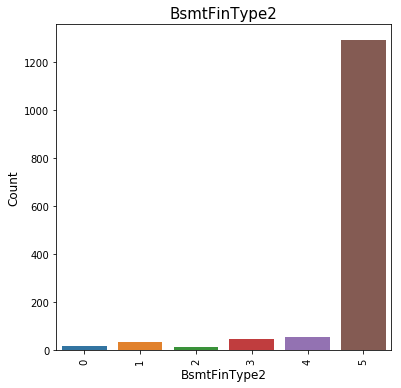

In [141]:
plt.figure(figsize=(6,6))
sns.countplot(x="BsmtFinType2", data=train_data)
plt.ylabel('Count', fontsize=12)
plt.xlabel('BsmtFinType2', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("BsmtFinType2", fontsize=15)
plt.show()

##### Since majority class lies on 5, this won't be helpful. so we can drop this

In [142]:
train_data.drop(['BsmtFinType2'],axis=1,inplace=True)

In [143]:
test_data.drop(['BsmtFinType2'],axis=1,inplace=True)

### BsmtFinSF2

In [144]:
print train_data.BsmtFinSF2.isnull().sum()
print test_data.BsmtFinSF2.isnull().sum()

0
1


In [145]:
test_data.BsmtFinSF2.fillna(method='ffill',inplace=True)

### BsmtUnfSF

In [146]:
print train_data.BsmtUnfSF.isnull().sum()
print test_data.BsmtUnfSF.isnull().sum()

0
1


In [147]:
test_data.BsmtUnfSF.fillna(method='ffill',inplace=True)

### TotalBsmtSF

In [148]:
print train_data.TotalBsmtSF.isnull().sum()
print test_data.TotalBsmtSF.isnull().sum()

0
1


In [149]:
test_data.TotalBsmtSF.fillna(method='ffill',inplace=True)

##### We can use TotalBsmtSF itself, instead of using BsmtFinSF1,BsmtUnfSF. So we can drop these columns

In [150]:
train_data.drop(['BsmtUnfSF'],axis=1,inplace=True)
test_data.drop(['BsmtUnfSF'],axis=1,inplace=True)

In [151]:

train_data.drop(['BsmtFinSF1'],axis=1,inplace=True)
test_data.drop(['BsmtFinSF1'],axis=1,inplace=True)

### Heating

In [152]:
train_data.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [153]:
train_data.drop(['Heating'],axis=1,inplace=True)

In [154]:
test_data.drop(['Heating'],axis=1,inplace=True)

### HeatingQC


In [155]:
train_data.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

In [156]:
print train_data.HeatingQC.isnull().sum()
print test_data.HeatingQC.isnull().sum()

0
0


In [157]:
train_data.HeatingQC = lb.fit_transform(train_data.HeatingQC)
test_data.HeatingQC = lb.transform(test_data.HeatingQC)

### CentralAir

In [158]:
print train_data.CentralAir.isnull().sum()
print test_data.CentralAir.isnull().sum()

0
0


In [159]:
"""
Yes - 1
No  - 0
"""
for i in train_data.index:
    if train_data['CentralAir'][i] == 'N':
        train_data.set_value(i,'CentralAir',0)
    elif train_data['CentralAir'][i] == 'Y':
        train_data.set_value(i,'CentralAir',1)
for i in test_data.index:
    if test_data['CentralAir'][i] == 'N':
        test_data.set_value(i,'CentralAir',0)
    elif test_data['CentralAir'][i] == 'Y':
        test_data.set_value(i,'CentralAir',1)

### Electrical

In [160]:
train_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [161]:
train_data.drop(['Electrical'],axis=1,inplace=True)
test_data.drop(['Electrical'],axis=1,inplace=True)

#### Living area square feet. We can consider total living area square feet (GrLivArea), instead of considering 1stFlrSF,2ndFlrSF,LowQualFinSF.

In [162]:
#train_data.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)
#test_data.drop(['1stFlrSF','2ndFlrSF','LowQualFinSF'],axis=1,inplace=True)

### GrLivArea

In [163]:
print train_data.GrLivArea.isnull().sum()
print test_data.GrLivArea.isnull().sum()

0
0


### BsmtFullBath, BsmtHalfBath, FullBath, HalfBath

In [164]:
print train_data.BsmtFullBath.isnull().sum()
print test_data.BsmtFullBath.isnull().sum()

0
2


In [165]:
test_data.BsmtFullBath.fillna(method='ffill',inplace=True)

In [166]:
print train_data.BsmtFullBath.isnull().sum()
print test_data.BsmtFullBath.isnull().sum()

0
0


In [167]:
print train_data.BsmtHalfBath.isnull().sum()
print test_data.BsmtHalfBath.isnull().sum()

0
2


In [168]:
test_data.BsmtHalfBath.fillna(method='ffill',inplace=True)

In [169]:
print train_data.FullBath.isnull().sum()
print test_data.FullBath.isnull().sum()

0
0


In [170]:
print train_data.HalfBath.isnull().sum()
print test_data.HalfBath.isnull().sum()

0
0


### BedroomAbvGr, KitchenAbvGr

In [171]:
print train_data.BedroomAbvGr.isnull().sum()
print test_data.BedroomAbvGr.isnull().sum()

0
0


In [172]:
print train_data.KitchenAbvGr.isnull().sum()
print test_data.KitchenAbvGr.isnull().sum()

0
0


### KitchenQual

In [173]:
train_data.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [174]:
print train_data.KitchenQual.isnull().sum()
print test_data.KitchenQual.isnull().sum()

0
1


In [175]:
test_data.KitchenQual.fillna(method='ffill',inplace=True)

In [176]:
train_data.KitchenQual = lb.fit_transform(train_data.KitchenQual)
test_data.KitchenQual = lb.transform(test_data.KitchenQual)

### TotRmsAbvGrd

In [177]:
print train_data.TotRmsAbvGrd.isnull().sum()
print test_data.TotRmsAbvGrd.isnull().sum()

0
0


In [178]:
train_data.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

#### Since the Typical Functionality has high observation, we can ignore this feature

In [179]:
train_data.drop(['Functional'],axis=1,inplace=True)
test_data.drop(['Functional'],axis=1,inplace=True)

### Fireplaces

In [180]:
print train_data.Fireplaces.isnull().sum()
print test_data.Fireplaces.isnull().sum()

0
0


### GarageType

In [181]:
train_data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [182]:
print train_data.GarageType.isnull().sum()
print test_data.GarageType.isnull().sum()

81
76


In [183]:
train_data.GarageType.fillna(method='ffill',inplace=True)
test_data.GarageType.fillna(method='ffill',inplace=True)

In [184]:
train_data.GarageType = lb.fit_transform(train_data.GarageType)
test_data.GarageType = lb.transform(test_data.GarageType)


In [185]:
train_data.GarageType.value_counts()

1    914
5    413
3     96
2     22
4      9
0      6
Name: GarageType, dtype: int64

In [186]:
col_to_del = []


In [187]:
col_to_del

[]

### GarageFinish

In [188]:
train_data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [189]:
print train_data.GarageFinish.isnull().sum()
print test_data.GarageFinish.isnull().sum()

81
78


In [190]:
train_data.GarageFinish.fillna("NG",inplace=True)
test_data.GarageFinish.fillna("NG",inplace=True)

In [191]:
train_data.GarageFinish = lb.fit_transform(train_data.GarageFinish)
test_data.GarageFinish = lb.transform(test_data.GarageFinish)

In [192]:
train_data.GarageFinish.value_counts()

3    605
2    422
0    352
1     81
Name: GarageFinish, dtype: int64

### GarageCars

In [193]:
print train_data.GarageCars.isnull().sum()
print test_data.GarageCars.isnull().sum()

0
1


In [194]:
test_data.GarageCars.fillna(method='ffill',inplace=True)

### GarageArea

In [195]:
print train_data.GarageArea.isnull().sum()
print test_data.GarageArea.isnull().sum()

0
1


In [196]:
test_data.GarageArea.fillna(method='ffill',inplace=True)

### GarageQual

In [197]:
print train_data.GarageQual.isnull().sum()
print test_data.GarageQual.isnull().sum()

81
78


In [198]:
train_data.GarageQual.fillna("NG",inplace=True)
test_data.GarageQual.fillna("NG",inplace=True)

In [199]:
train_data.GarageQual.value_counts()

TA    1311
NG      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [200]:
train_data.GarageQual = lb.fit_transform(train_data.GarageQual)
test_data.GarageQual = lb.transform(test_data.GarageQual)

In [201]:
train_data.GarageQual.value_counts()

5    1311
3      81
1      48
2      14
4       3
0       3
Name: GarageQual, dtype: int64

### GarageCond

In [202]:
train_data.GarageCond.fillna("NG",inplace=True)
test_data.GarageCond.fillna("NG",inplace=True)

In [203]:
train_data.GarageCond = lb.fit_transform(train_data.GarageCond)
test_data.GarageCond = lb.transform(test_data.GarageCond)

### PavedDrive

In [204]:
train_data.PavedDrive.fillna(method='ffill',inplace=True)
test_data.PavedDrive.fillna(method='ffill',inplace=True)

In [205]:
train_data.PavedDrive = lb.fit_transform(train_data.PavedDrive)
test_data.PavedDrive = lb.transform(test_data.PavedDrive)

### WoodDeckSF

In [206]:
train_data.WoodDeckSF.fillna(method='ffill',inplace=True)
test_data.WoodDeckSF.fillna(method='ffill',inplace=True)

### OpenPorchSF

In [207]:
train_data.OpenPorchSF.fillna(method='ffill',inplace=True)
test_data.OpenPorchSF.fillna(method='ffill',inplace=True)

### EnclosedPorch

In [208]:
train_data.EnclosedPorch.fillna(method='ffill',inplace=True)
test_data.EnclosedPorch.fillna(method='ffill',inplace=True)

### 3SsnPorch

In [209]:
train_data['3SsnPorch'].fillna(method='ffill',inplace=True)
test_data['3SsnPorch'].fillna(method='ffill',inplace=True)

### ScreenPorch

In [210]:
train_data['ScreenPorch'].value_counts()

0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
200       2
198       2
216       2
184       2
259       2
100       2
176       2
170       2
288       2
142       2
153       1
154       1
152       1
155       1
145       1
156       1
143       1
322       1
140       1
161       1
128       1
122       1
410       1
119       1
116       1
99        1
95        1
80        1
63        1
60        1
53        1
40        1
130       1
175       1
163       1
165       1
291       1
287       1
276       1
273       1
271       1
266       1
265       1
263       1
260       1
252       1
234       1
233       1
225       1
374       1
222       1
220       1
210       1
204       1
197       1
385       1
190       1
396       1
185       1
182       1
440       1
178       1
312       1
480       1
Name: ScreenPorch, dtype: int64

In [211]:
col_to_del.append('ScreenPorch')

##### Most of the house doesnt have Pool, so we can remove this also

In [212]:
col_to_del.append('PoolArea')

### MiscVal

In [213]:
train_data.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [214]:
col_to_del.append('MiscVal')

### MoSold

In [215]:
print train_data.MoSold.isnull().sum()
print test_data.MoSold.isnull().sum()

0
0


### SaleType, SaleCondition

In [216]:
train_data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [217]:
train_data.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [218]:
print train_data.SaleType.isnull().sum()
print test_data.SaleType.isnull().sum()

0
1


In [219]:
test_data.SaleType.fillna(method='ffill',inplace=True)

In [220]:
train_data.SaleType = lb.fit_transform(train_data.SaleType)
test_data.SaleType = lb.transform(test_data.SaleType)

In [221]:
print train_data.SaleCondition.isnull().sum()
print test_data.SaleCondition.isnull().sum()

0
0


In [222]:
train_data.SaleCondition = lb.fit_transform(train_data.SaleCondition)
test_data.SaleCondition = lb.transform(test_data.SaleCondition)

##### Now we can drop the unwanted features

In [223]:
col_to_del

['ScreenPorch', 'PoolArea', 'MiscVal']

In [224]:
train_data.drop(col_to_del,axis=1,inplace=True)
test_data.drop(col_to_del,axis=1,inplace=True)

In [225]:
train_data.shape

(1460, 66)

In [226]:
test_data.shape

(1459, 65)

In [227]:
train_data = train_data.astype('int64')

In [228]:
test_data.loc[test_data.GarageAge.isnull()==True, 'GarageAge'] = test_data.HouseAge

In [229]:
test_data = test_data.astype('int64')

### Create a copy for train and test data

In [230]:
train_data_bk = train_data.copy()
test_data_bk = test_data.copy()
train_data_bk.drop(['Id'],axis=1,inplace=True)
test_data_bk.drop(['Id'],axis=1,inplace=True)

In [231]:
print len(test_data_bk)

1459


In [232]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,SaleType,SaleCondition,SalePrice,RecentlyModifiedInYears,HouseAge,GarageAge
0,1,60,0,65,8450,0,3,3,0,4,0,5,2,2,0,5,7,5,1,1,12,1,1,196,2,4,2,2,3,3,2,0,856,0,1,856,854,0,1710,1,0,2,1,3,1,2,8,0,1,2,2,548,5,5,2,0,61,0,0,2,8,4,208500,0,5,5
1,2,20,0,80,9600,0,3,3,0,2,0,24,1,2,0,2,6,8,1,1,8,1,2,0,3,4,1,2,3,1,0,0,1262,0,1,1262,0,0,1262,0,1,2,0,3,1,3,6,1,1,2,2,460,5,5,2,298,0,0,0,5,8,4,181500,0,31,31
2,3,60,0,68,11250,0,0,3,0,4,0,5,2,2,0,5,7,5,1,1,12,1,1,162,2,4,2,2,3,2,2,0,920,0,1,920,866,0,1786,1,0,2,1,3,1,2,6,1,1,2,2,608,5,5,2,0,42,0,0,9,8,4,223500,1,7,7
3,4,70,0,60,9550,0,0,3,0,0,0,6,2,2,0,5,7,5,1,1,13,1,2,0,3,4,0,3,1,3,0,0,756,2,1,961,756,0,1717,1,0,1,0,3,1,2,7,1,5,3,3,642,5,5,2,0,35,272,0,2,8,0,140000,55,91,8
4,5,60,0,84,14260,0,0,3,0,2,0,15,2,2,0,5,8,5,1,1,12,1,1,350,2,4,2,2,3,0,2,0,1145,0,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,1,1,2,3,836,5,5,2,192,84,0,0,12,8,4,250000,0,8,8


In [233]:
train_data_bk.sample(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,MoSold,SaleType,SaleCondition,SalePrice,RecentlyModifiedInYears,HouseAge,GarageAge
1092,50,0,60,8400,0,3,0,0,4,0,18,2,2,0,0,6,5,1,1,8,1,2,0,3,4,2,3,3,3,4,0,1181,1,1,1390,304,0,1694,0,0,2,0,4,1,3,7,1,5,3,2,576,5,5,2,342,0,128,0,6,8,4,136500,25,83,83
742,20,0,65,8450,0,3,3,0,4,0,20,2,2,0,2,7,5,1,1,12,1,1,108,3,4,2,2,3,3,5,0,1349,0,1,1349,0,0,1349,0,0,2,0,3,1,3,6,0,1,3,2,539,5,5,2,120,55,0,0,12,8,4,179000,1,7,7
1111,60,0,80,10480,0,3,3,0,4,0,14,2,2,0,5,7,6,3,1,9,1,1,660,3,4,1,3,3,3,0,0,803,4,1,1098,866,0,1964,0,0,2,1,4,1,3,8,1,1,2,2,483,5,5,2,0,69,0,0,9,8,4,205000,0,32,32


### Train Test Split

In [238]:
train_data.to_csv('traindata_up.csv',index=False)
test_data.to_csv('testdata_up.csv',index=False)

In [234]:
X = train_data_bk.drop(['SalePrice'],axis=1)
y = train_data_bk.SalePrice

In [235]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [236]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 64), (292, 64), (1168L,), (292L,))

### Feature Scaling

In [282]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [283]:
X_train_sc[:2]

array([[-0.86836547, -0.44353489,  0.90637853,  0.10321202, -0.06556848,
         0.75871851,  0.30573419, -0.02927282,  0.59558013, -0.23538656,
         0.61814767, -0.04805136,  0.        , -0.40537284, -0.54303046,
         2.13150648, -0.51304058,  1.85949446, -0.13306725, -1.45484576,
         0.        , -1.27472428,  1.91152154, -3.72056713,  0.36421002,
         0.85283053, -2.63308861,  0.29323612, -2.005581  , -0.40819652,
        -0.29182263,  1.86572881, -0.88747181,  0.26750632,  1.78757018,
        -0.8025555 , -0.12591806,  0.60188649, -0.82074726, -0.23688761,
         0.79276853, -0.77362412,  0.14628481, -0.20389805, -0.4227455 ,
         1.5121838 ,  0.60543808, -0.72462557,  0.93676281,  1.68363344,
         1.43474327,  0.30642509,  0.29223793,  0.29901157, -0.74257536,
         0.87411633, -0.36470299, -0.11533286,  0.25639595, -1.02837162,
         1.12162592, -0.56455997, -1.21252864, -1.13518313],
       [-0.86836547, -0.44353489, -0.42520101, -0.37288066, -0.

### Fitting into Models

In [290]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [291]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(XtrainNorm, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [293]:
y_p = regressor.predict(XtestNorm)

In [294]:
y_p

array([194029.20529923, 179981.74241943, 132506.31425268, 231958.20960361,
        24273.83019209, 102471.85759983, 207873.95803662, 173211.24106412,
       330921.45624448, 148826.07823544, 225733.63391511, 203823.33023584,
       249909.44838363, 148291.59844217, 149225.51385004, 139242.40235929,
       228618.7744641 , 113888.35458832, 158254.17586908, 233855.27287078,
       126091.88824147, 169822.48415938,  49085.16214722, 172861.67837773,
       243442.23106164, 198419.57965794, 122698.13242599,  59656.04733238,
       305388.15198278, 129062.80074649, 152653.33064616, 220331.25147539,
       146250.40373069, 247548.76383598, 287666.45924312, 189632.31179811,
       349352.7467772 ,  93866.22393058, 230041.83425271, 314289.35728636,
       198735.55324646, 140444.69181249, 204522.34068631, 263362.21120287,
       267164.66588608, 146774.79447625, 236825.02769995, 145387.068073  ,
       189739.3272991 , 125779.07321578, 321555.37480739, 162521.10176265,
       197780.80043135,  

In [295]:
print len(y_p)

292


In [296]:
rmse = sqrt(mean_squared_error(y_test, y_p))
mse = mean_squared_error(y_test, y_p)
mae = mean_absolute_error(y_test, y_p)
r2 = r2_score(y_test,y_p)

print "RMSE = >",rmse
print "MSE = >",mse
print "MAE = >",mae
print "R Squared = >",r2

RMSE = > 54360.0417623
MSE = > 2955014140.400345
MAE = > 34432.711953254795
R Squared = > 0.5720998637672083


In [301]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train_sc, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [302]:
y_p_rf = rf.predict(X_test_sc)

In [303]:
rmse = sqrt(mean_squared_error(y_test, y_p_rf))
mse = mean_squared_error(y_test, y_p_rf)
mae = mean_absolute_error(y_test, y_p_rf)
r2 = r2_score(y_test,y_p_rf)


print "RMSE = >",rmse
print "MSE = >",mse
print "MAE = >",mae
print "R Squared = >",r2

RMSE = > 34910.4346487
MSE = > 1218738447.3611987
MAE = > 18794.018150684933
R Squared = > 0.823520862209023


In [305]:
rfs = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfs.fit(X_train, y_train)
y_p_rfs = rfs.predict(X_test)

In [306]:
rmse = sqrt(mean_squared_error(y_test, y_p_rfs))
mse = mean_squared_error(y_test, y_p_rfs)
mae = mean_absolute_error(y_test, y_p_rfs)
r2 = r2_score(y_test,y_p_rfs)

print "RMSE = >",rmse
print "MSE = >",mse
print "MAE = >",mae
print "R Squared = >",r2

RMSE = > 34861.0375441
MSE = > 1215291938.6506848
MAE = > 18693.40068493151
R Squared = > 0.8240199331023205


In [307]:
print y_p_rfs[25:35]
print list(y_test[25:35])

[233200.  171790.   87308.3 326181.3 119412.5 150760.  201770.  140390.
 271721.7 354573.6]
[168000L, 177500L, 84500L, 320000L, 118500L, 110000L, 213000L, 156000L, 250000L, 372500L]


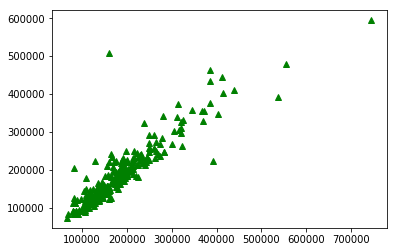

In [308]:
plt.plot(list(y_test), list(y_p_rfs), 'g^')
plt.show()

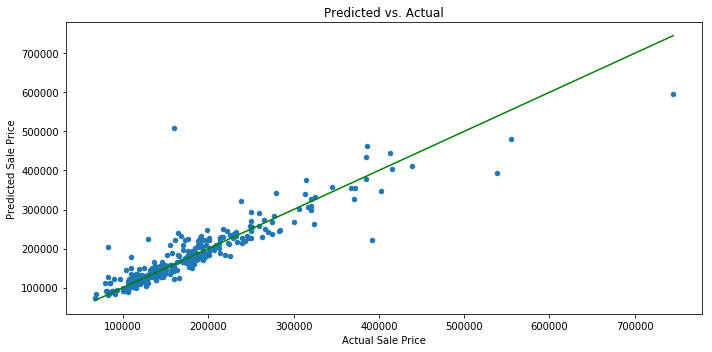

In [309]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_p_rfs, s=20)
plt.title('Predicted vs. Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],'g')
plt.tight_layout()

In [245]:
dt =DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_p_dt = dt.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_p_dt))
mse = mean_squared_error(y_test, y_p_dt)
mae = mean_absolute_error(y_test, y_p_dt)
r2 = r2_score(y_test,y_p_dt)

print "RMSE = >",rmse
print "MSE = >",mse
print "MAE = >",mae
print "R Squared = >",r2

RMSE = > 39468.2687135
MSE = > 1557744235.239726
MAE = > 26147.602739726026
R Squared = > 0.7744312078369211


In [262]:
test_data.shape

(1459, 63)

In [265]:
test_data_wo_id = test_data.drop(['Id'],axis=1)

In [266]:
f_pred = rfs.predict(test_data_wo_id)

In [267]:
f_pred.__len__()

1459

In [270]:
submission_file = pd.DataFrame({"Id":test_data.Id,"SalePrice":f_pred})
submission_file.to_csv('Sample_Submission_.csv',index=False)

In [269]:
submission_file.head()

,Id,SalePrice
0,1461,121500.0
1,1462,161040.0
2,1463,174650.0
3,1464,182239.0
4,1465,202550.0


### SVR

In [219]:
kfold = KFold(n_splits=10, random_state=0)
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
scoring = 'neg_mean_squared_error'
results = np.sqrt(-cross_val_score(svr,X_train,y_train, cv=kfold, scoring=scoring))
rmse_svr = results.mean()
rmse_svr

80077.2727643956

In [220]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [221]:
y_p = svr.predict(X_train)

### Decision Tree

In [222]:
kfold = KFold(n_splits=10, random_state=0)
regressor =DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
scoring = 'neg_mean_squared_error'
results = np.sqrt(-cross_val_score(regressor,X_train,y_train, cv=kfold, scoring=scoring))
rmse_dt = results.mean()
rmse_dt

41302.10392309921

### RandomForest

In [223]:
kfold = KFold(n_splits=10, random_state=0)
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_train, y_train)
scoring = 'neg_mean_squared_error'
results = np.sqrt(-cross_val_score(rf,X_train,y_train, cv=kfold, scoring=scoring))
rmse_rf = results.mean()
rmse_rf

30587.25414187633

### Lasso

In [224]:
from sklearn.linear_model import Lasso

kfold = KFold(n_splits=10, random_state=0)
lasso = Lasso()
lasso.fit(X_train, y_train)
scoring = 'neg_mean_squared_error'
results = np.sqrt(-cross_val_score(lasso,X_train,y_train, cv=kfold, scoring=scoring))
rmse_las = results.mean()
rmse_las


29931.916958630773

### Predicting test-data

In [225]:
test_data.shape

(1459, 60)

In [226]:
test_data_bk_sc = sc.fit_transform(test_data_bk)

In [227]:
y_pred_rf = rf.predict(test_data_bk_sc)

In [228]:
submission_file = pd.DataFrame({"Id":test_data.Id,"SalePrice":y_pred_rf})
submission_file.to_csv('Sample_Submission_rf.csv',index=False)

### XGRegressor with GridSearchCV

In [237]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [238]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


In [240]:
params = {'min_child_weight':[1,2,3,4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [1,2,3,4]}

xgb = XGBRegressor(nthread=-1) 
grid = GridSearchCV(xgb, params)
grid.fit(X_train, y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'subsample': [0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 'gamma': [0.3, 0.4, 0.5], 'min_child_weight': [1, 2, 3, 4, 5], 'max_depth': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [241]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.3, learning_rate=0.1,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8)

In [242]:
grid.best_params_, grid.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.3,
  'max_depth': 4,
  'min_child_weight': 1,
  'subsample': 0.8},
 0.8768578234910132)

In [244]:
# Print the r2 score
print(r2_score(y_test, grid.best_estimator_.predict(X_test))) 

#0.8469417478797604


0.8643511411541495


In [327]:
s = grid.best_estimator_.predict(X_test_sc)

In [328]:
s[:2]

array([233052.38, 154091.98], dtype=float32)

In [329]:
y_test[:2]

529    200624
491    133000
Name: SalePrice, dtype: int64

In [265]:
rmse = sqrt(mean_squared_error(y_test, s))
mse = mean_squared_error(y_test, s)
mae = mean_absolute_error(y_test, s)
r2 = r2_score(y_test,s)


In [266]:
print "RMSE = >",rmse
print "MSE = >",mse
print "MAE = >",mae
print "R Squared = >",r2

RMSE = > 32511.4952731
MSE = > 1056997324.8950056
MAE = > 17277.17649026113
R Squared = > 0.8469417478797604


In [317]:
test_data_sc = sc.transform(test_data.drop(['Id'],axis=1))

In [318]:
f_pred = grid.best_estimator_.predict(test_data_sc)

In [319]:
submission_file = pd.DataFrame({"Id":test_data.Id,"SalePrice":f_pred})


In [320]:
submission_file.shape

(1459, 2)

In [321]:
submission_file.head()

,Id,SalePrice
0,1461,121835.382812
1,1462,169086.375000
2,1463,178345.609375
3,1464,186697.656250
4,1465,200717.984375


In [322]:
submission_file.to_csv('Sample_Submission_scaled.csv',index=False)